In [1]:
import sys, time
import os.path
import argparse
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

from matplotlib.animation import FuncAnimation

## plot the fields of the optical beam

In [2]:
filename = "../fel1d.hdf5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
fields = hdf['InteractionField']
# print(fields.attrs.keys())
N_field = fields.attrs['N_field']
N_steps = fields.attrs['N_steps']
dt = fields.attrs['dt']
prop = np.array([fields.attrs['prop.x'], fields.attrs['prop.y'], fields.attrs['prop.z']])
origin = np.array([fields.attrs['origin.x'], fields.attrs['origin.y'], fields.attrs['origin.z']])
print(f'field size = {N_field},  steps = {N_steps},  dt = {dt:.4g} s')
print('propagation step = ',prop)
print('origin position = ',origin)

a = np.array(fields)
hdf.close()

print(f'have read {a.shape} array.')


reading  ../fel1d.hdf5

field size = 400,  steps = 1502,  dt = 3.336e-14 s
propagation step =  [-0.e+00 -0.e+00 -1.e-05]
origin position =  [0.         0.         0.00149896]
have read (1502, 400) array.


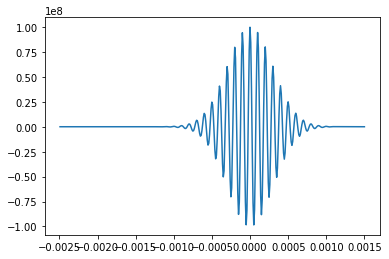

In [3]:
%matplotlib inline

E_x = np.array(a[100])
t = dt*np.arange(E_x.shape[0])
z = origin[2] + prop[2]*np.arange(E_x.shape[0])

plt.plot(z,E_x)
plt.show()

<IPython.core.display.Javascript object>


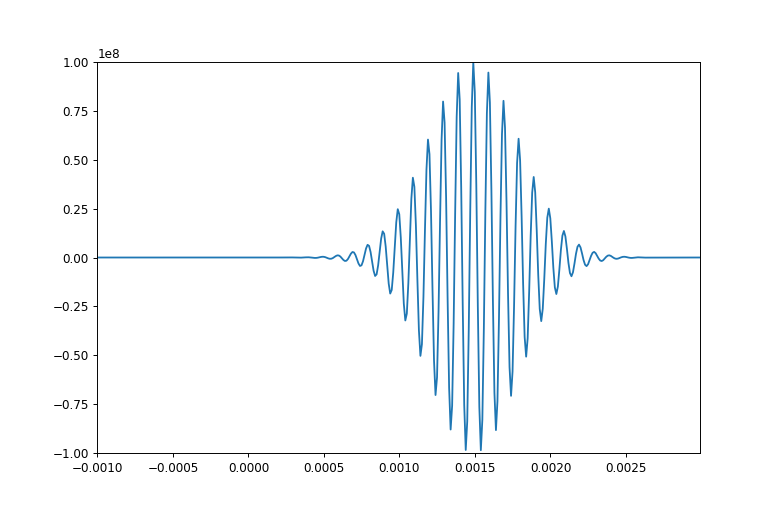

In [4]:
%matplotlib notebook

z = origin[2] + prop[2]*np.arange(E_x.shape[0])

fig, ax = plt.subplots(figsize=(9,6))
line, = ax.plot([])     # A tuple unpacking to unpack the only plot
ax.set_xlim(z[-1], z[0])
ax.set_ylim(-1e8, 1e8)
# anno = ax.text(0.75 ,0.85, f'c*t = {t_head*sc.c:.6f} m', transform=ax.transAxes, size=14)

def step(frame_num):
    global a, z, E_x, ax, line
    z = origin[2] + prop[2]*(np.arange(E_x.shape[0])-frame_num)
    E_x = np.array(a[frame_num])
    line.set_data((z, E_x))
    ax.set_xlim(z[-1], z[0])
    # anno.set_text(f'c*t = {t_head*sc.c:.6f} m')
    return line

anim = FuncAnimation(fig, step, frames=150, interval=100, repeat=False, blit=True)

plt.show()

In [11]:
anim.save('animation.gif', writer='imagemagick', fps=20)

## plot the particle trajectories

In [7]:
filename = "../fel1d_trajectories.hdf5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
group = hdf['Trajectories']
print(group.attrs.keys())
N_step = group.attrs['NOTS']
N_part = group.attrs['NOP']

coordinates = np.array(group)
hdf.close()

print(f'have read {coordinates.shape} array.')


reading  ../fel1d_trajectories.hdf5

<KeysViewHDF5 ['NOP', 'NOTS']>
have read (1502, 20, 6) array.


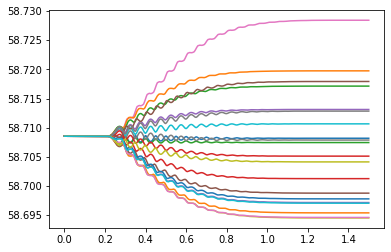

In [8]:
%matplotlib inline

for i in range(N_part):
    p1 = coordinates[:,i,:]
    x = p1[:,0]
    z = p1[:,2]
    bgx = p1[:,3]
    bgy = p1[:,4]
    bgz = p1[:,5]
    bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
    gamma = np.sqrt(bg2+1.0)
    plt.plot(z,gamma)
    
plt.show()